# Analysing CO2 Emissions

**Step 1 - The Questions:** 
- Who has contributed mostly to global CO2 emissions?
- Does Co2 Emissions affect Life Extectancy?
- Does population have anything to do with Co2 emissions in a particular country?

The Below analysis will display the relationship between CO2 Emissions, Life Expenctancy and Global population.
The data will include two seperate dataframes. One will include the Global CO2 Emissions each year over a span of 20 years and how it compares to the global population. The second will include each countries Co2 Emission in tons and there respective populations and life expectancies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
pd.set_option('display.float_format', lambda x: '%.2f' % x) #ensures all numbers are displayed to 2 decimal places

### The Datasets

**Step 2 - Data Collection**

The Data was readily available on Kaggle

**2a.** Dataset 1

In [2]:
df = pd.read_csv("CO2Emiss_LifeExp.csv")
df.head()

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy
0,1,China,Asia,10432751400.00,1414049351.00,76.21
1,2,United States,North America,5011686600.00,323015995.00,78.89
2,3,India,Asia,2533638100.00,1324517249.00,68.90
3,4,Russia,Europe,1661899300.00,145275383.00,71.83
4,5,Japan,Asia,1239592060.00,127763265.00,84.09


**2b.** Dataset 2

In [3]:
df1 = pd.read_csv("CO2Emiss_Pop.csv")
df1.head()

,Year,Co2Emiss_Tons,Population
0,2016,35753305000,7464022049
1,2015,35631078000,7379797139
2,2014,35686780000,7295290765
3,2013,35416599000,7210581976
4,2012,34790564000,7125828059


### Data Cleaning 1

**Step 3 - Cleaning and Formatting Dataset 1**

This step will involve checking for missing values, looking out for duplicates and ensuring the data is accurate.

**3.1.** The below confirms whether there are NaN values. 

In [4]:
df.isnull().values.any()

True

**3.2.** The below checks for NaN values, value counts and for any duplicates

In [5]:
df.isna().sum()

#                 0
Country           2
Continent         2
Co2_Emiss_Tons    2
Population        2
LifeExpectancy    3
dtype: int64

In [6]:
df[df.duplicated()].count()

#                 0
Country           0
Continent         0
Co2_Emiss_Tons    0
Population        0
LifeExpectancy    0
dtype: int64

In [7]:
df.count()

#                 211
Country           209
Continent         209
Co2_Emiss_Tons    209
Population        209
LifeExpectancy    208
dtype: int64

In [8]:
# df_des = df_des.loc[:,["Co2_Emiss_Tons", "Population", "LifeExpectancy"]]
# df_des

**3.3.** The table shows all rows that include any NaN values

In [9]:
df[df.isna().any(axis=1)]

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy
118,119,DR Congo,Africa,6564773.00,78789127.00,NaN
209,210,NaN,NaN,NaN,NaN,NaN
210,211,NaN,NaN,NaN,NaN,NaN


**3.4.** According to the above the bottom two rows are all NaN values so would be removings those rows

In [10]:
df.drop(df.tail(2).index, inplace = True)


In [11]:
df.tail()

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy
204,205,Anguilla,North America,30262.00,14429.00,81.44
205,206,Saint Helena,Africa,13128.00,5956.00,80.25
206,207,Saint Pierre & Miquelon,North America,8842.00,5934.00,80.65
207,208,Faeroe Islands,South America,1953.00,48173.00,80.25
208,209,Greenland,North America,1530.00,56412.00,71.49


**3.5.** As seen in **3.3,** the index for DR Congo is 118 and the NaN value located in the life expectancy has now been filled with the mean of all life expectancies.

In [12]:
df['LifeExpectancy'].fillna((df['LifeExpectancy'].mean()), inplace=True)

In [13]:
df.loc[118,:]

#                        119
Country             DR Congo
Continent             Africa
Co2_Emiss_Tons    6564773.00
Population       78789127.00
LifeExpectancy         72.70
Name: 118, dtype: object

**3.6.** The below rounds each life expectancy to the nearest whole number

In [14]:
df['LifeExpectancy'] = df['LifeExpectancy'].apply(np.round)

In [15]:
df.head()

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy
0,1,China,Asia,10432751400.00,1414049351.00,76.00
1,2,United States,North America,5011686600.00,323015995.00,79.00
2,3,India,Asia,2533638100.00,1324517249.00,69.00
3,4,Russia,Europe,1661899300.00,145275383.00,72.00
4,5,Japan,Asia,1239592060.00,127763265.00,84.00


**3.7.** As Co2 Emissions Per Capita may be good for the analysis it has been calculated and included below. Which is Co2 Emissions divided by Population. Co2 percentage of total has also been calculated and added.

In [16]:
df['Co2_Emiss_PerCapita'] = df['Co2_Emiss_Tons'].div(df['Population'], axis = 0)
df['Co2_Pct_of_Total (%)'] = (df['Co2_Emiss_Tons'] / df['Co2_Emiss_Tons'].sum()) * 100
df.head()

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy,Co2_Emiss_PerCapita,Co2_Pct_of_Total (%)
0,1,China,Asia,10432751400.00,1414049351.00,76.00,7.38,30.18
1,2,United States,North America,5011686600.00,323015995.00,79.00,15.52,14.50
2,3,India,Asia,2533638100.00,1324517249.00,69.00,1.91,7.33
3,4,Russia,Europe,1661899300.00,145275383.00,72.00,11.44,4.81
4,5,Japan,Asia,1239592060.00,127763265.00,84.00,9.70,3.59


### Data Cleaning 2

**S3.8. Cleaning and Formatting Dataset 2**

The below includes 20 years of Co2 Emissions and Population data for 20 years from 1997 to 2016.

The below data appears to be clean. So the first step would be to calculate and include Co2 Emissions per Capita, as well as change between population and the change in CO2 Emssions per year. The data will also be sorted to start from 1997 and end in 2016 and the index will also be resetted.

In [17]:
df1.isnull().values.any()

False

In [18]:
df1[df1.duplicated()].count()

Year             0
Co2Emiss_Tons    0
Population       0
dtype: int64

In [19]:
df1 = df1.sort_values(by=['Year'])
df1['Co2_Emiss_Change'] = df1['Co2Emiss_Tons'].pct_change() *100
df1['Pop_Change'] = df1['Population'].pct_change()*100
df1['Co2_Emiss_Per_Capita'] = df1['Co2Emiss_Tons'].div(df1['Population'], axis = 0)
df1 = df1.reset_index()
df1 = df1.drop("index", axis=1)
df1.head()

,Year,Co2Emiss_Tons,Population,Co2_Emiss_Change,Pop_Change,Co2_Emiss_Per_Capita
0,1997,24398282000,5905045788,NaN,NaN,4.13
1,1998,24541647000,5984793942,0.59,1.35,4.10
2,1999,24733708000,6064239055,0.78,1.33,4.08
3,2000,25593733000,6143493823,3.48,1.31,4.17
4,2001,25877903000,6222626606,1.11,1.29,4.16


### Analysing the Data 

**Step 4:** - Analysing Dataset 1

**4.1.** The below is a line graph visualisation of the stats. **Count** was not includes as it does do anything for the Data.


In [20]:
df_des = df.describe()
df_des.reset_index(inplace=True)

df_des = df_des[df_des['index'] != 'count']
df_des

,index,#,Co2_Emiss_Tons,Population,LifeExpectancy,Co2_Emiss_PerCapita,Co2_Pct_of_Total (%)
1,mean,105.00,165387452.31,35683446.71,72.68,4.68,0.48
2,std,60.48,830832911.37,138564030.66,7.69,5.73,2.40
3,min,1.00,1530.00,2928.00,52.00,0.03,0.00
4,25%,53.00,1682100.00,1170187.00,68.00,0.66,0.00
5,50%,105.00,9320279.00,7151953.00,74.00,2.60,0.03
6,75%,157.00,58708734.00,24262712.00,79.00,6.39,0.17
7,max,209.00,10432751400.00,1414049351.00,84.00,37.29,30.18


In [21]:
# plt.plot(df_des['index'], df_des[['Co2_Emiss_Tons']])
# plt.title('Co2 Emissions (tons) Stats')
# plt.xlabel('index')
# plt.ylabel('Co2 Emissions (tons)')
# plt.show()

# plt.plot(df_desa['index'], df_des[['Population']])
# plt.title('Population Stats')
# plt.xlabel('index')
# plt.ylabel('Population')
# plt.show()

# plt.plot(df_des['index'], df_des[['LifeExpectancy']])
# plt.title('Life Expectancy Stats')
# plt.xlabel('index')
# plt.ylabel('Life Expectancy')
# plt.show()

# plt.plot(df_des['index'], df_des[['Co2_Emiss_PerCapita']])
# plt.title('Co2 Emissions Per Capita Stats')
# plt.xlabel('index')
# plt.ylabel('Co2 Emissions Per Capita')
# plt.show()

In [22]:
#df1 = df1.loc[:,["Co2Emiss_Tons", "Population", "Co2_Emiss_Change", "Pop_Change", "Co2_Emiss_Per_Capita"]]
#df1

In [23]:
df_m = df.loc[:,['Co2_Emiss_Tons', 'Population', 'LifeExpectancy', 'Co2_Emiss_PerCapita', 'Co2_Pct_of_Total (%)']]
df_m.head()

,Co2_Emiss_Tons,Population,LifeExpectancy,Co2_Emiss_PerCapita,Co2_Pct_of_Total (%)
0,10432751400.00,1414049351.00,76.00,7.38,30.18
1,5011686600.00,323015995.00,79.00,15.52,14.50
2,2533638100.00,1324517249.00,69.00,1.91,7.33
3,1661899300.00,145275383.00,72.00,11.44,4.81
4,1239592060.00,127763265.00,84.00,9.70,3.59


**4.2.** 
<span style="color:blue">***The below shows the correlations. Co2 Emissions and Population seem to have a strong correlation of *0.83*. However, Co2 Emissions and Life Expectancy do not seem to have as strong a correlation which is *0.48*.**
</span>


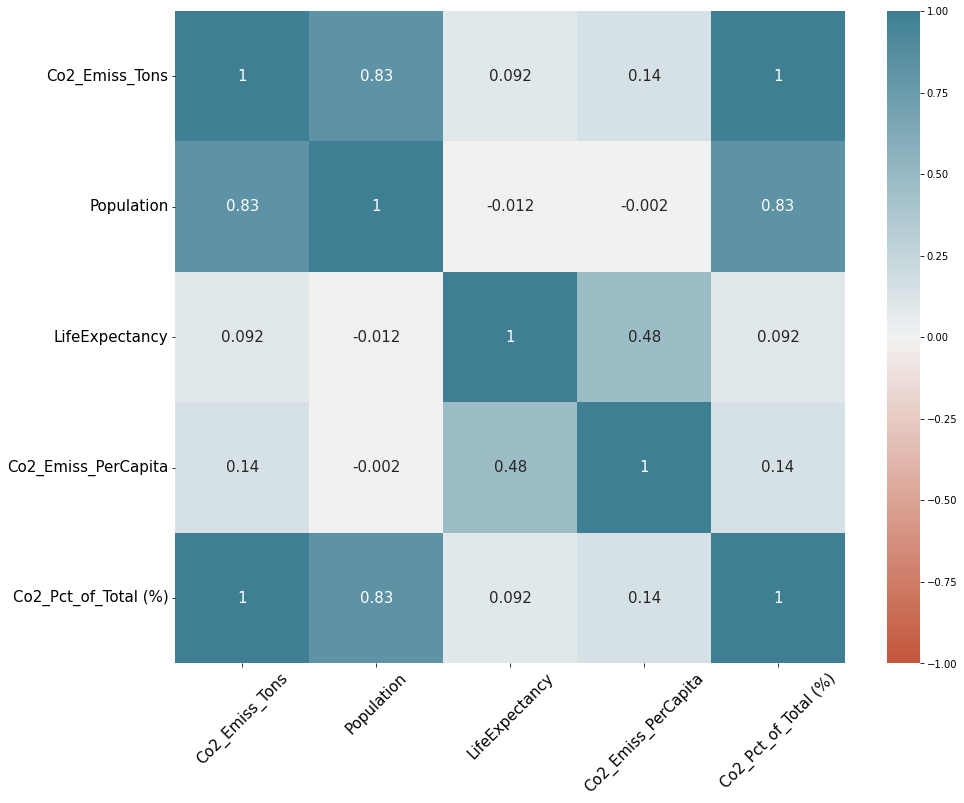

In [24]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(df_m.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

**4.3** 
<span style="color:blue">**Unfortunately the scatter plots does not provide much useful visualisation. Mostly due to outliers**
</span>

In [25]:
#_a = pd.plotting.scatter_matrix(df_m, figsize=(20, 20))

In [26]:
# sns.histplot(df["Co2_Emiss_Tons"])
# sns.set(rc={'figure.figsize':(20.7,8.27)})

In [27]:
# ax = sns.boxplot(x=df["Co2_Emiss_Tons"])

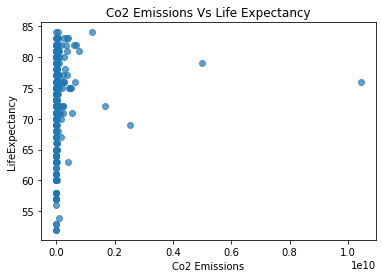

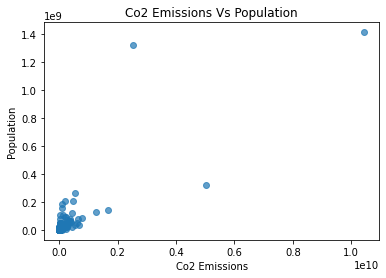

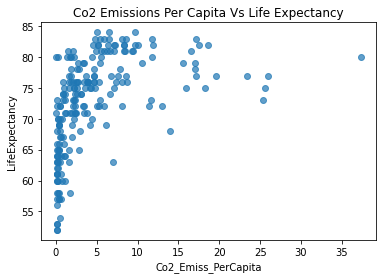

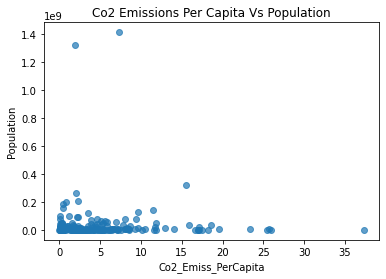

In [28]:
plt.scatter(df["Co2_Emiss_Tons"], df["LifeExpectancy"], alpha=0.7)
plt.title('Co2 Emissions Vs Life Expectancy')
plt.xlabel('Co2 Emissions')
plt.ylabel('LifeExpectancy')
plt.show()

plt.scatter(df["Co2_Emiss_Tons"], df["Population"], alpha=0.7)
plt.title('Co2 Emissions Vs Population')
plt.xlabel('Co2 Emissions')
plt.ylabel('Population')
plt.show()

plt.scatter(df["Co2_Emiss_PerCapita"], df["LifeExpectancy"], alpha=0.7)
plt.title('Co2 Emissions Per Capita Vs Life Expectancy')
plt.xlabel('Co2_Emiss_PerCapita')
plt.ylabel('LifeExpectancy')
plt.show()

plt.scatter(df["Co2_Emiss_PerCapita"], df["Population"], alpha=0.7)
plt.title('Co2 Emissions Per Capita Vs Population')
plt.xlabel('Co2_Emiss_PerCapita')
plt.ylabel('Population')
plt.show()

Not a very good visualisation, so a dataset was created which included top 10 highest Co2 Emissions

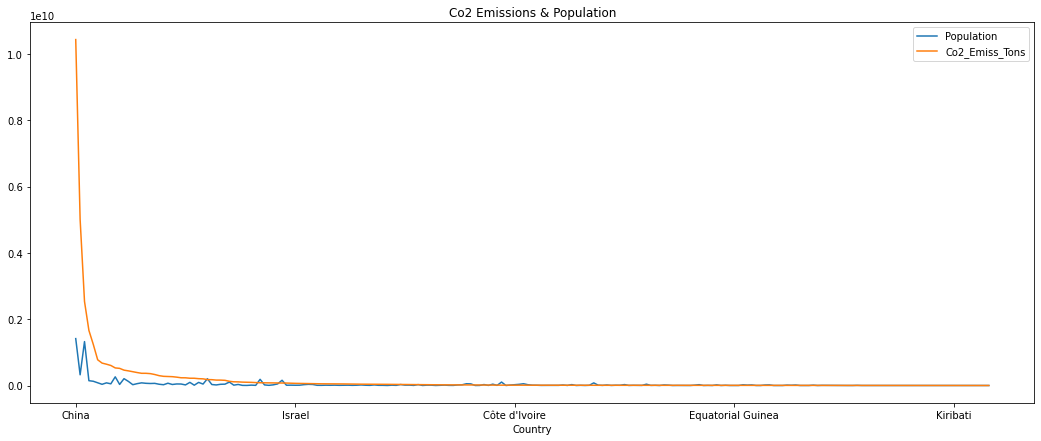

In [29]:
df.plot(x="Country", y=["Population", "Co2_Emiss_Tons"], figsize=(18, 7))
plt.title('Co2 Emissions & Population')
plt.xlabel('Country')

plt.show()

In [30]:
top10 = df.head(10)
top10

,#,Country,Continent,Co2_Emiss_Tons,Population,LifeExpectancy,Co2_Emiss_PerCapita,Co2_Pct_of_Total (%)
0,1,China,Asia,10432751400.00,1414049351.00,76.00,7.38,30.18
1,2,United States,North America,5011686600.00,323015995.00,79.00,15.52,14.50
2,3,India,Asia,2533638100.00,1324517249.00,69.00,1.91,7.33
3,4,Russia,Europe,1661899300.00,145275383.00,72.00,11.44,4.81
4,5,Japan,Asia,1239592060.00,127763265.00,84.00,9.70,3.59
5,6,Germany,Europe,775752190.00,82193768.00,81.00,9.44,2.24
6,7,Canada,North America,675918610.00,36382944.00,82.00,18.58,1.96
7,8,Iran,Asia,642560030.00,79563989.00,76.00,8.08,1.86
8,9,South Korea,Asia,604043830.00,50983457.00,82.00,11.85,1.75
9,10,Indonesia,Asia,530035650.00,261556381.00,71.00,2.03,1.53


##### For a total of 209 countries the top 10 account for almost 70% of all global Co2 Emissions
##### USA and China alone make up almost 45%

In [31]:
top10_total = top10['Co2_Pct_of_Total (%)'].sum()
top10_total


69.7445276867456

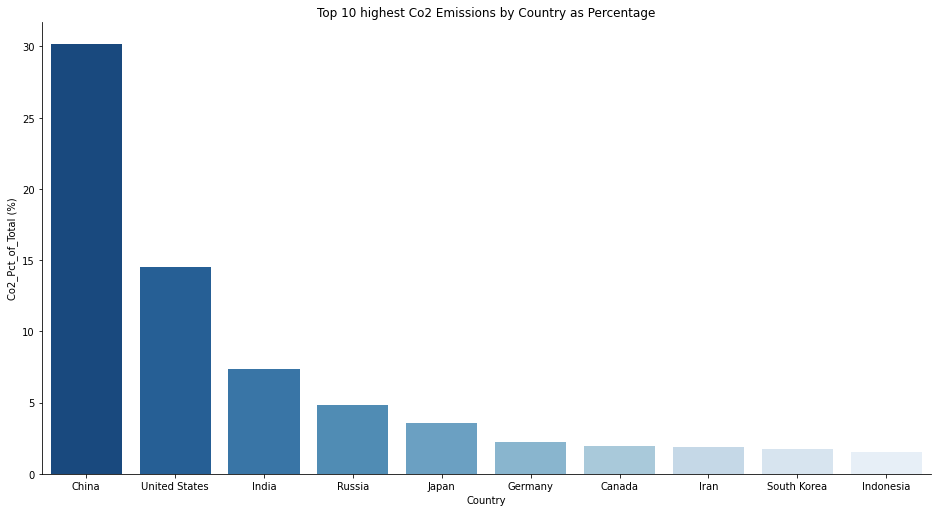

In [32]:
sns.catplot(
    data=top10,
    kind="bar",
    x="Country",
    y="Co2_Pct_of_Total (%)",
    ci=None,
    height=7,
    palette="Blues_r",
    aspect=15/8
    ).set(
    title="Top 10 highest Co2 Emissions by Country as Percentage")

###### Although USA has the second highest Co2 Emissions it is not so much due to population as their population is much less than than of India for instance

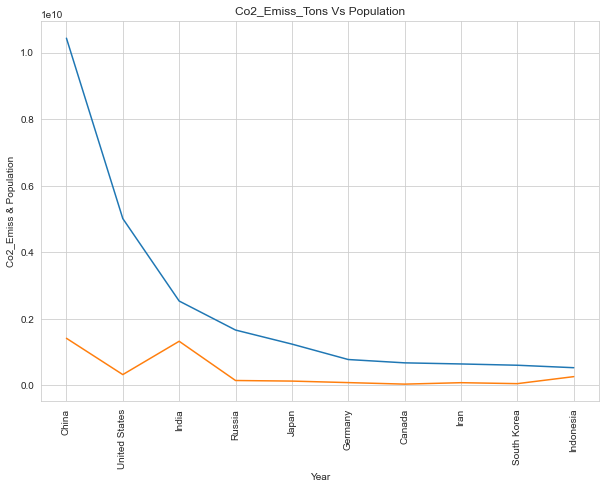

In [56]:
plt.plot(top10['Country'], top10[['Co2_Emiss_Tons', 'Population']])
plt.title('Co2_Emiss_Tons Vs Population')
plt.xlabel('Year')
plt.ylabel('Co2_Emiss & Population')
plt.gcf().set_size_inches(10, 7)
plt.xticks(rotation=90)
plt.show()

##### Grouped Data by continent

In [34]:
con_tot = df.groupby(['Continent']).sum()
con_tot



,#,Co2_Emiss_Tons,Population,LifeExpectancy,Co2_Emiss_PerCapita,Co2_Pct_of_Total (%)
Continent,,,,,,
Africa,7638,1211918735.00,1212794071.00,3641.00,60.35,3.51
Asia,3354,19873117518.00,4471972199.00,3705.00,335.19,57.49
Europe,2897,5575681330.00,743786042.00,3236.00,327.53,16.13
North America,4738,6306706222.00,573121837.00,2601.00,164.70,18.25
Oceania,2040,463429721.00,39956113.00,953.00,48.84,1.34
South America,1278,1135124006.00,416210101.00,1054.00,41.24,3.28


##### Europe, Asia and North America account for over 90% of global Co2 Emissions

In [35]:
df3 = df.groupby('Continent')['Co2_Pct_of_Total (%)'].sum()
df3

Continent
Africa           3.51
Asia            57.49
Europe          16.13
North America   18.25
Oceania          1.34
South America    3.28
Name: Co2_Pct_of_Total (%), dtype: float64

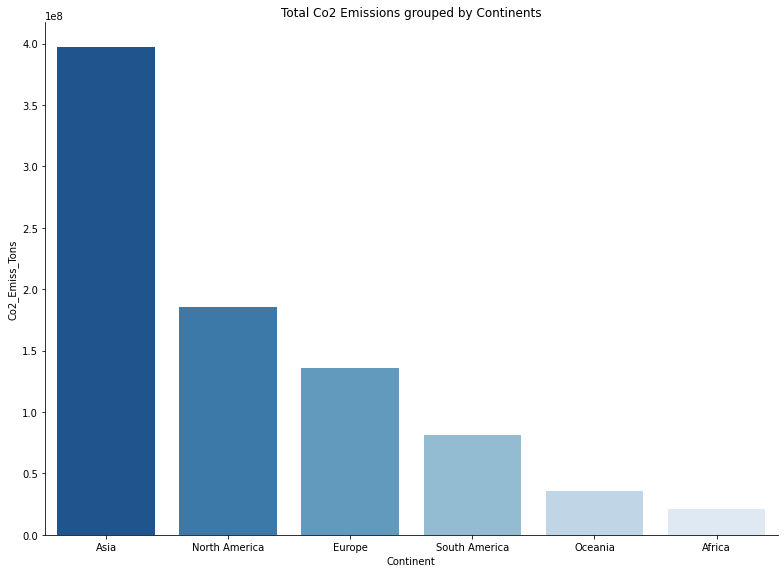

In [36]:
sns.catplot(
    data=df,
    kind="bar",
    x="Continent",
    y="Co2_Emiss_Tons",
    ci=None,
    height=8,
    palette="Blues_r",
    aspect=11/8
    ).set(
    title="Total Co2 Emissions grouped by Continents")

In [47]:
Asia_ = df.loc[df.Continent == "Asia"]
Africa_ =  df.loc[df.Continent == "Africa"]
N_Amer_ =  df.loc[df.Continent == "North America"]
S_Amer_ =  df.loc[df.Continent == "South America"]
Europe_ =  df.loc[df.Continent == "Europe"]
Oceania_ =  df.loc[df.Continent == "Oceania"]

Text(0.5, 1.0, "Co2 Emissions in 10's of Billion tons for each Country in Oceania")

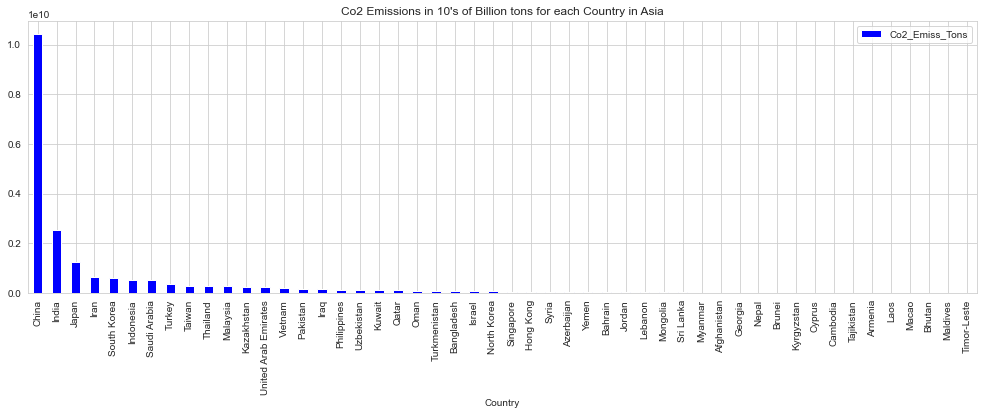

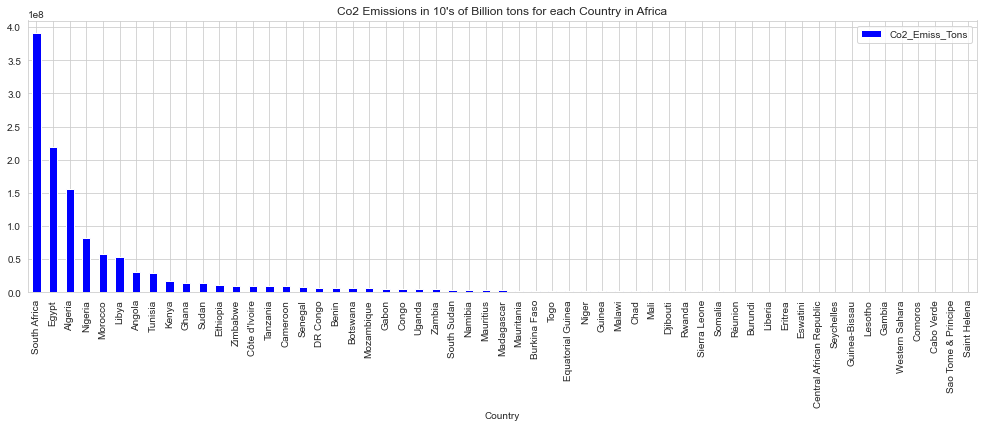

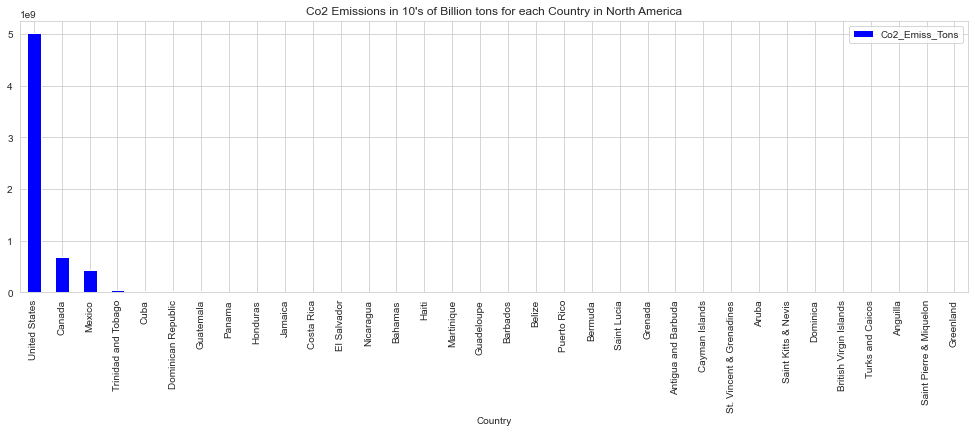

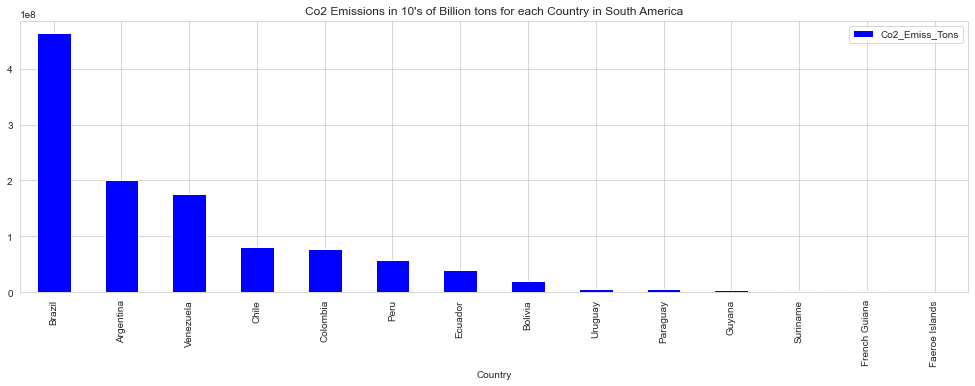

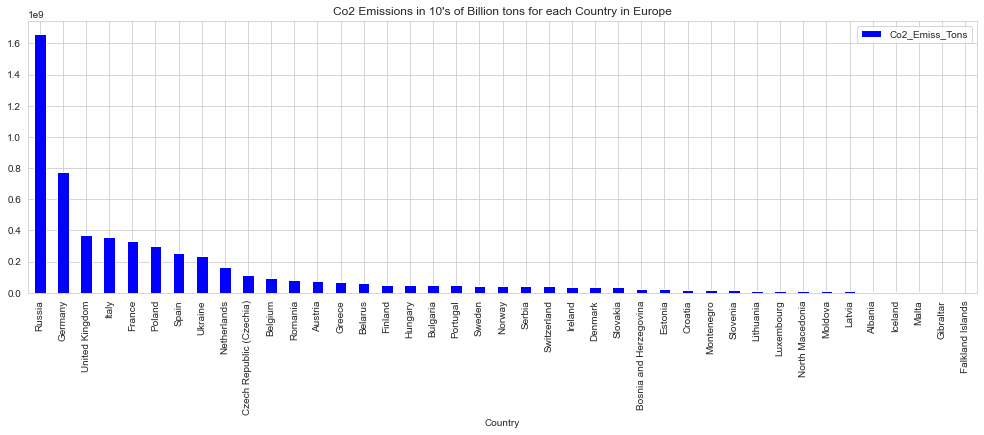

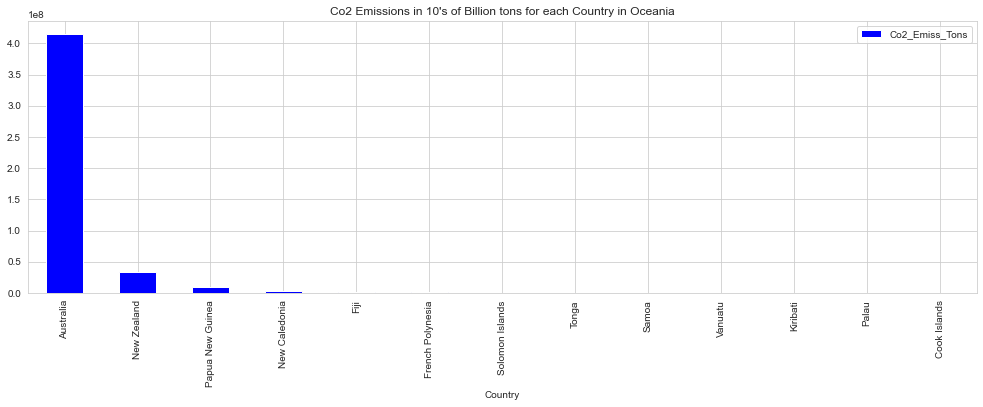

In [48]:
a1 = Asia_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a1.set_title("Co2 Emissions in 10's of Billion tons for each Country in Asia")
a2 = Africa_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a2.set_title("Co2 Emissions in 10's of Billion tons for each Country in Africa")
a3 = N_Amer_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a3.set_title("Co2 Emissions in 10's of Billion tons for each Country in North America")
a4 = S_Amer_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a4.set_title("Co2 Emissions in 10's of Billion tons for each Country in South America")
a5 = Europe_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a5.set_title("Co2 Emissions in 10's of Billion tons for each Country in Europe")
a6 = Oceania_.plot.bar(x= 'Country', y='Co2_Emiss_Tons', color = 'blue', figsize = (17, 5))
a6.set_title("Co2 Emissions in 10's of Billion tons for each Country in Oceania")

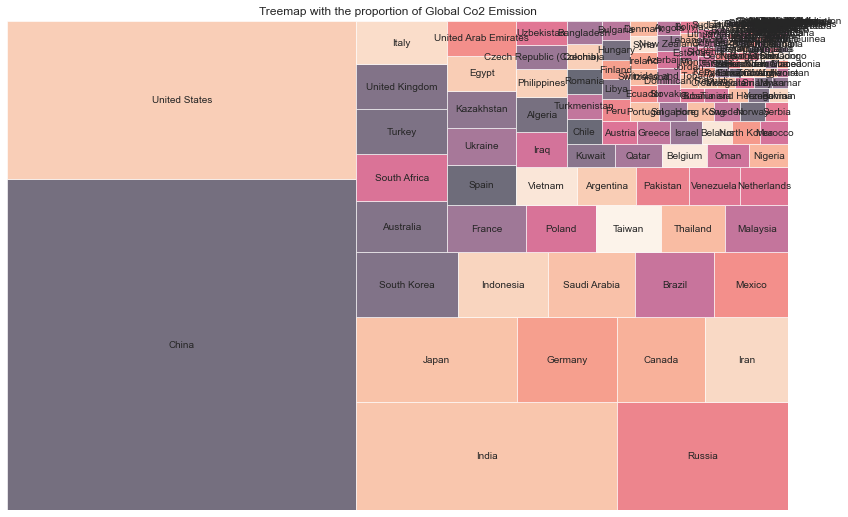

In [46]:
fig = plt.gcf()
fig.set_size_inches(14, 9)

sns.set_style(style="whitegrid") 
sizes= df["Co2_Emiss_Tons"].values
label=df["Country"]
squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Treemap with the proportion of Global Co2 Emission')
plt.axis('off')
plt.show()

### Analysing Dataset 2

###### The below shows the correlations. Co2 Emissions and Population seem to have a strong correlation of 0.99, same with Co2 Emissions and Population. Co2 Emissions, Co2 Emissions per capita and population increase every year.

In [59]:
df1.head()

,Year,Co2Emiss_Tons,Population,Co2_Emiss_Change,Pop_Change,Co2_Emiss_Per_Capita
0,1997,24398282000,5905045788,NaN,NaN,4.13
1,1998,24541647000,5984793942,0.59,1.35,4.10
2,1999,24733708000,6064239055,0.78,1.33,4.08
3,2000,25593733000,6143493823,3.48,1.31,4.17
4,2001,25877903000,6222626606,1.11,1.29,4.16


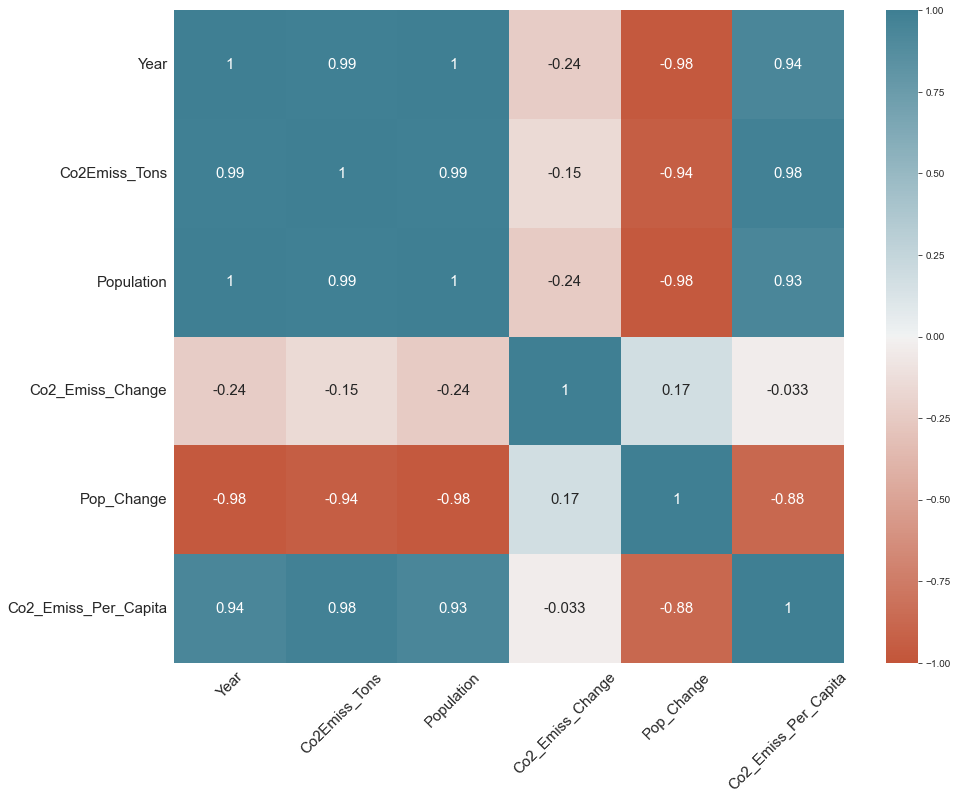

In [49]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

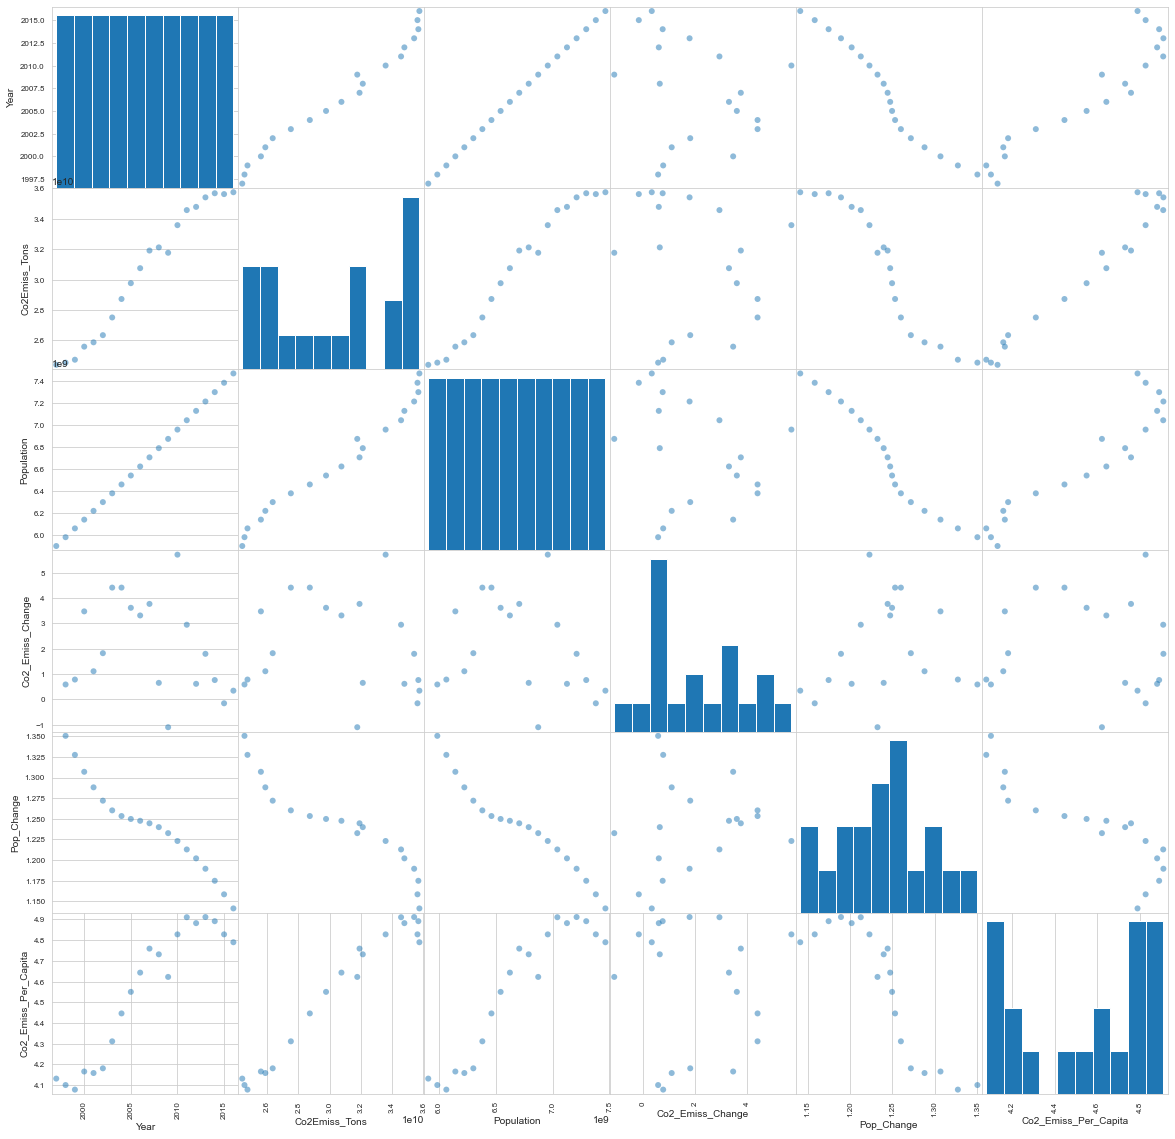

In [50]:
a = pd.plotting.scatter_matrix(df1, figsize=(20, 20), marker="o")

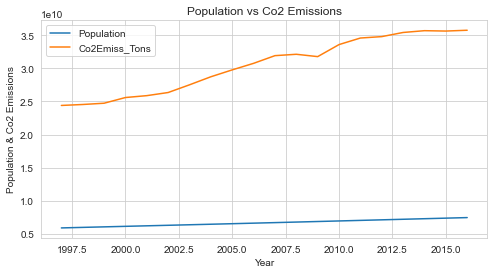

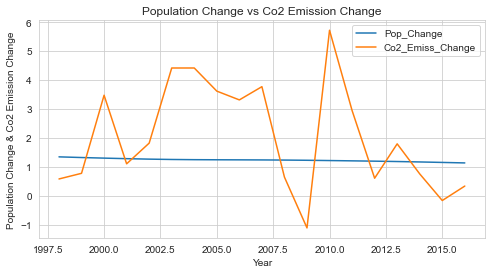

In [55]:
df1.plot(x="Year", y=["Population", "Co2Emiss_Tons"], figsize=(8, 4))
plt.title("Population vs Co2 Emissions")
plt.xlabel('Year')
plt.ylabel('Population & Co2 Emissions')
plt.show()

df1.plot(x="Year", y=['Pop_Change', 'Co2_Emiss_Change'], figsize=(8, 4))
plt.title('Population Change vs Co2 Emission Change')
plt.xlabel('Year')
plt.ylabel('Population Change & Co2 Emission Change')
plt.show()


Text(0.5, 1.0, 'Co2 Emissions in 10s of Billions of tons for each year ')

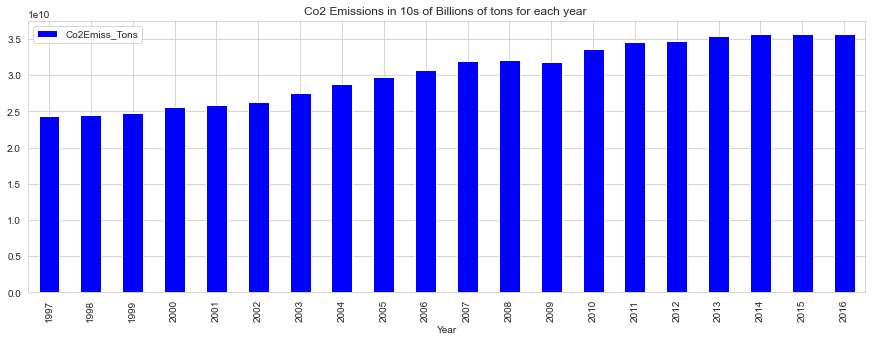

In [57]:
a1 = df1.plot.bar(x='Year', y='Co2Emiss_Tons', color = 'blue', figsize = (15, 5))
a1.set_title("Co2 Emissions in 10s of Billions of tons for each year ")

Text(0.5, 1.0, 'Co2 Emissions in 10s of Billions of tons for each year ')

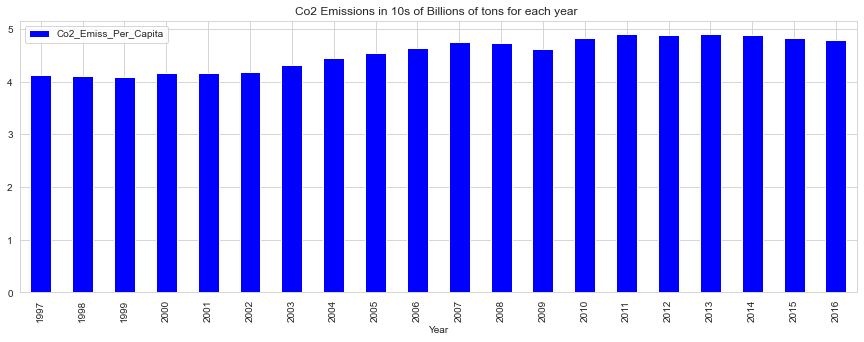

In [73]:
a2 = df1.plot.bar(x='Year', y='Co2_Emiss_Per_Capita', color = 'blue', figsize = (15, 5))
a2.set_title("Co2 Emissions in 10s of Billions of tons for each year ")

Text(0.5, 1.0, 'Co2 Emissions in 10s of Billions of tons for each year ')

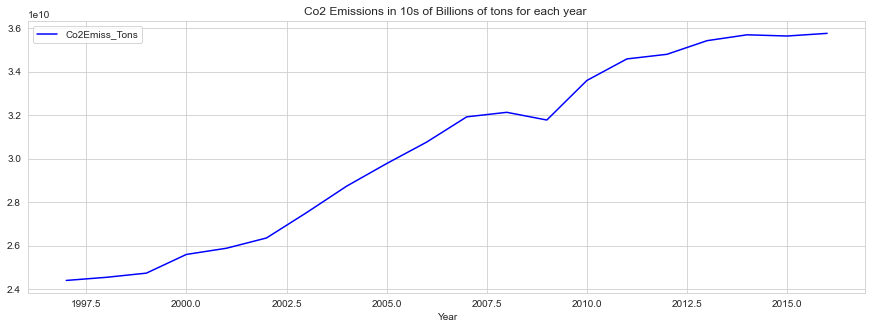

In [75]:
a1 = df1.plot.line(x='Year', y='Co2Emiss_Tons', color = 'blue', figsize = (15, 5))
a1.set_title("Co2 Emissions in 10s of Billions of tons for each year ")

Text(0.5, 1.0, 'Co2 Emissions in 10s of Billions of tons for each year ')

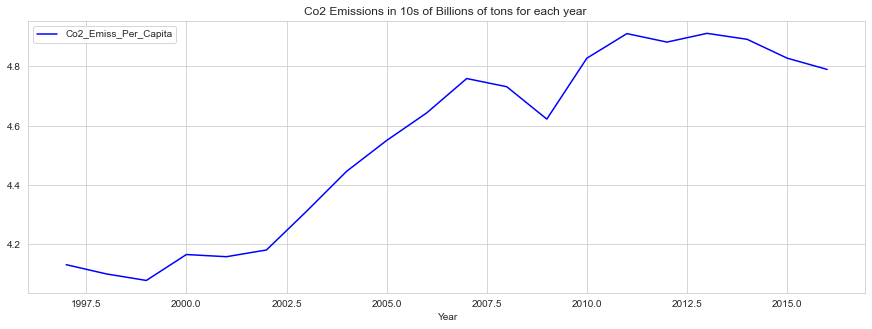

In [76]:
a2 = df1.plot.line(x='Year', y='Co2_Emiss_Per_Capita', color = 'blue', figsize = (15, 5))
a2.set_title("Co2 Emissions in 10s of Billions of tons for each year ")

(array([1., 1., 6., 1., 2., 1., 3., 1., 2., 1.]),
 array([-1.10169121, -0.41952288,  0.26264545,  0.94481378,  1.62698211,
         2.30915044,  2.99131877,  3.67348709,  4.35565542,  5.03782375,
         5.71999208]),
 <BarContainer object of 10 artists>)

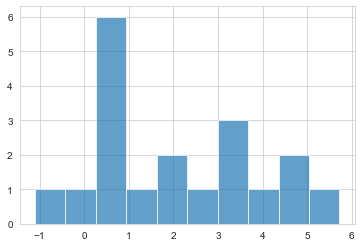

In [71]:
plt.hist(df1["Co2_Emiss_Change"], bins=10, alpha=0.7)

(array([2., 1., 2., 2., 3., 4., 1., 2., 1., 1.]),
 array([1.14129031, 1.16221215, 1.18313398, 1.20405581, 1.22497765,
        1.24589948, 1.26682131, 1.28774315, 1.30866498, 1.32958681,
        1.35050865]),
 <BarContainer object of 10 artists>)

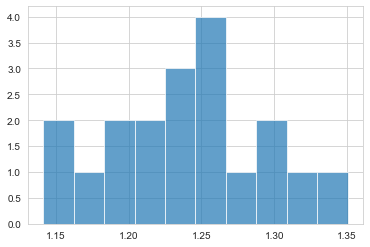

In [72]:
plt.hist(df1["Pop_Change"], bins=10, alpha=0.7)

#### No correlation between the change in Co2 Emissions and change in Population (0.17)

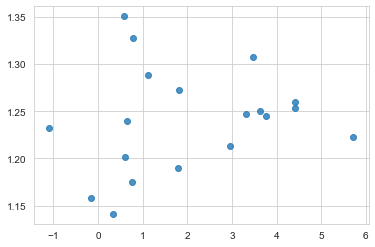

In [78]:

plt.scatter(df1["Co2_Emiss_Change"], df1["Pop_Change"], alpha=0.8)
#plt.plot(x, a*x+b)
plt.show()


### Intepreting the results 
 
    Step 5: Interpreting The Results.
    
- China and USA are the biggest contributors to Co2 emissions as they account for 45% of all Co2 Emissions.
- Co2 Emissions has a weak correlation with Life Expentancy.
- Population does seem to have a large impact on the Co2 Emissions seen in a particular country.